In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import Recall, Precision
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import shutil
import sys
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import os
import cv2 as cv

In [2]:
def imagePreprocessing(image):
    
    
    # Create a CLAHE object with clip limit 2.0 and tile grid size of (6, 6)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))

    # Apply CLAHE to the image
    equalized = clahe.apply(image)
    
#      # Convert the image to LAB color space
#     lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)

#     # Split the LAB channels
#     l, a, b = cv.split(lab)

#     # Apply CLAHE to the L channel
#     clahe = cv.createCLAHE(clipLimit=3.0, tileGridSize=(4,4))
#     cl = clahe.apply(l)

#     # Merge the CLAHE-enhanced L channel with the original A and B channels
#     merged = cv.merge([cl, a, b])

#     # Convert the merged image back to BGR color space
#     equalized = cv.cvtColor(merged, cv.COLOR_LAB2BGR)
    
    return equalized
        
        

In [3]:
X = []
y = []
def getData(directory):
    # Directory path containing the images
    directory = directory
    # Loop over all files in the directory
    for filename in os.listdir(directory):

        # Check if the file is an image (assuming JPG format here)
        if filename.endswith(".jpg"):

            # Read the image using OpenCV
            image = cv.imread(os.path.join(directory, filename),0)
            
            # resized image
            new_width, new_height = 224, 224  # replace with your desired width and height
            resized_img = cv.resize(image, (new_width, new_height)) 
            

            # Check the label of image 
            if filename[0] == 'O':
                
                # Append the label to the list 
                y.append([1])
                
                equalized = imagePreprocessing(resized_img)
                
                
                scaled_image = equalized / 255.0 # scaled image
                
                
                
                
                # Append the image to the list
                X.append(scaled_image)
            
            else:
                
                
                # Append the label to the list 
                y.append([0])
                
                
                
                equalized = imagePreprocessing(resized_img)
               
                
                scaled_image = equalized / 255.0 # scaled image
                
                
                # Append the image to the list
                X.append(scaled_image)
                
            
            
            
getData(r'C:\Users\small\anaconda3\eye diseases\ODIR-5K\N_O_dataset\dataset')

# Convert the list to a NumPy array
X = np.array(X)

y = np.array(y)

[0]


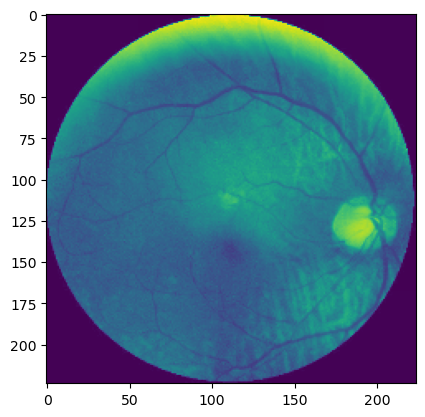

In [4]:
v = 1610
plt.imshow(X[v])
print(y[v])

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,random_state=43)

In [6]:
# model architecture

with tf.device('/device:GPU:0'):
#     model = models.Sequential()

#     model.add(layers.Conv2D(16, (5, 5),padding='same', activation='relu', input_shape=(224, 224, 3)))
#     model.add(layers.Conv2D(16, (5, 5), padding='same',activation='relu'))
#     model.add(layers.AveragePooling2D((2, 2),strides=1))
#     model.add(layers.Dropout(0.3))
    
#     model.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu'))
#     model.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu'))
#     model.add(layers.AveragePooling2D((2, 2),strides=1))
#     model.add(layers.Dropout(0.3))
    
#     model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))
#     model.add(layers.Conv2D(64, (3, 3),padding='same', activation='relu'))
#     model.add(layers.AveragePooling2D((2, 2),strides=1))
#     model.add(layers.Dropout(0.3))
    
#     model.add(keras.layers.BatchNormalization())
    

#     model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))
#     model.add(layers.Conv2D(128, (3, 3), padding='same',activation='relu'))
#     model.add(layers.AveragePooling2D((2, 2),strides=1))
#     model.add(layers.Dropout(0.3))
# #     model.add(layers.BatchNormalization())

#     model.add(layers.GlobalAveragePooling2D())
#     model.add(layers.Dropout(0.2))
    
# #     model.add(layers.Dense(2048, activation='relu'))
# #     model.add(keras.layers.Flatten())
#     model.add(layers.Dense(1080, activation='relu'))
#     model.add(layers.Dropout(0.3))
#     model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dropout(0.3))
#     model.add(layers.Dense(256, activation='relu'))
#     model.add(layers.Dropout(0.2))
#     model.add(layers.Dense(1, activation='sigmoid'))
    
###########################################################

#     model = models.Sequential()

#     model.add(layers.Conv2D(32, (5, 5),strides=4, activation='relu', input_shape=(224, 224, 1)))
#     model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#     model.add(layers.AveragePooling2D((2, 2),strides=1))
#     model.add(layers.Dropout(0.4))

#     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#     model.add(layers.AveragePooling2D((2, 2),strides=1))
#     model.add(layers.Dropout(0.4))
    
#     model.add(keras.layers.BatchNormalization())

#     model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#     model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#     model.add(layers.AveragePooling2D((2, 2),strides=1))
#     model.add(layers.Dropout(0.3))

# #     model.add(layers.BatchNormalization())

#     model.add(layers.GlobalAveragePooling2D())
#     model.add(layers.Dropout(0.3))
    
# #     model.add(layers.Dense(2048, activation='relu'))
# #     model.add(keras.layers.Flatten())
# #     model.add(layers.Dense(1080, activation='relu'))
# #     model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(128, activation='relu'))
#     model.add(layers.Dropout(0.5))
# #     model.add(layers.Dense(256, activation='relu'))
# #     model.add(layers.Dropout(0.3))
#     model.add(layers.Dense(1, activation='sigmoid'))

    model = models.Sequential()

    model.add(layers.Conv2D(32, (7, 7),strides=4, activation='relu', input_shape=(224, 224, 1)))
    model.add(layers.MaxPooling2D((2, 2),strides=2))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2),strides=2))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2),strides=2))

#     model.add(layers.BatchNormalization())

    model.add(layers.GlobalMaxPooling2D())

#     model.add(layers.Dense(2048, activation='relu'))
#     model.add(keras.layers.Flatten())
    model.add(layers.Dense(1080, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))


    model.summary()    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 32)        1600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                        

In [7]:
metrics = ['accuracy',
               tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.Recall(name='recall')]

In [8]:
# run of the model 

with tf.device('/device:CPU:0'):
#     class_weights = {}
#     class_totals = np.sum(to_categorical(y_train), axis=0)
#     total_samples = np.sum(class_totals)
#     class_weights
#     for i in range(len(class_totals)):
#         class_weight = total_samples / (len(class_totals) * class_totals[i])
#         class_weights[i] = class_weight
#     print(class_weights)
#     arr=np.array(y_train)

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='binary_crossentropy',
                  metrics=metrics)

    history = model.fit(X_train, y_train,batch_size=64 ,epochs=10,shuffle=True,
                        validation_data=(X_val, y_val))

Epoch 1/10
59/59 [==============================] - 8s 121ms/step - loss: 0.4598 - accuracy: 0.7562 - precision: 0.7669 - recall: 0.6856 - val_loss: 0.7597 - val_accuracy: 0.4656 - val_precision: 0.4656 - val_recall: 1.0000
Epoch 2/10
59/59 [==============================] - 8s 130ms/step - loss: 0.1133 - accuracy: 0.9607 - precision: 0.9542 - recall: 0.9618 - val_loss: 0.9338 - val_accuracy: 0.4656 - val_precision: 0.4656 - val_recall: 1.0000
Epoch 3/10
59/59 [==============================] - 7s 122ms/step - loss: 0.0933 - accuracy: 0.9695 - precision: 0.9628 - recall: 0.9721 - val_loss: 0.7929 - val_accuracy: 0.4755 - val_precision: 0.4703 - val_recall: 1.0000
Epoch 4/10
59/59 [==============================] - 7s 111ms/step - loss: 0.0526 - accuracy: 0.9814 - precision: 0.9763 - recall: 0.9841 - val_loss: 1.1469 - val_accuracy: 0.4885 - val_precision: 0.4766 - val_recall: 1.0000
Epoch 5/10
59/59 [==============================] - 7s 111ms/step - loss: 0.0507 - accuracy: 0.9827 - pr

In [9]:
with tf.device('/device:CPU:0'):
    y_pred = model.predict(X_val)

51/51 [==============================] - 1s 16ms/step


In [10]:
# Convert the predicted probabilities to class labels
threshold = 0.5

y_pred_classes = np.where(y_pred >= threshold, 1, 0)

conf_mat = confusion_matrix(y_val, y_pred_classes)

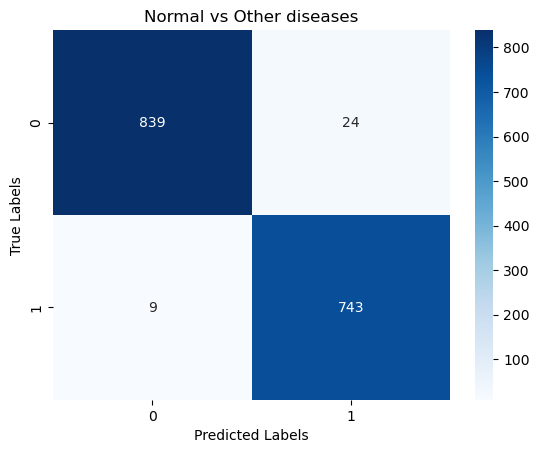

In [11]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues",fmt='g')

# Add labels and title to the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Normal vs Other diseases")

# Show the plot
plt.show()

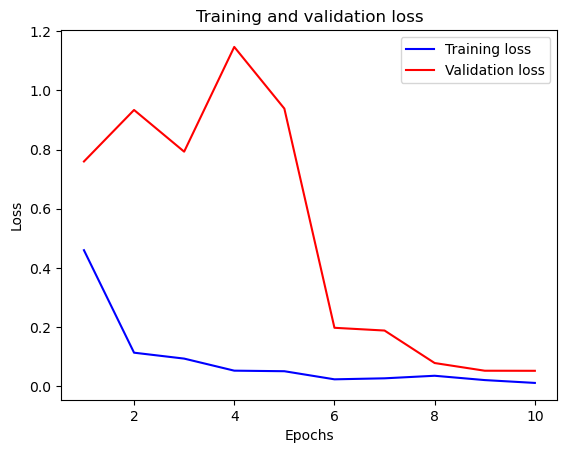

In [12]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

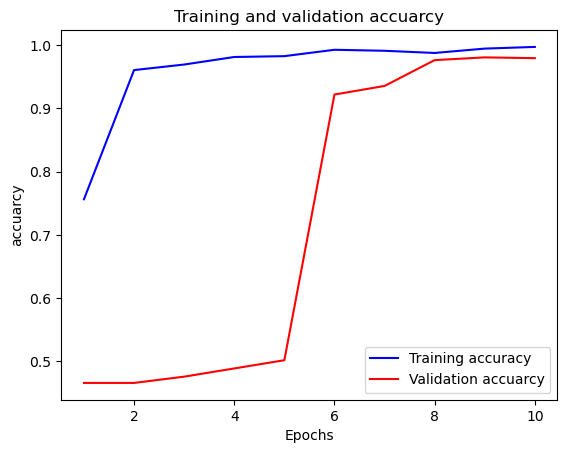

In [13]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuarcy')
plt.title('Training and validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('accuarcy')
plt.legend()

plt.show()

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# assume y_true and y_pred are the ground truth and predicted labels respectively
# for a multi-class classification problem with classes 0 to n-1
cm = confusion_matrix(y_val, y_pred_classes)
report = classification_report(y_val, y_pred_classes)

# recall for each class can be obtained from the classification report
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       863
           1       0.97      0.99      0.98       752

    accuracy                           0.98      1615
   macro avg       0.98      0.98      0.98      1615
weighted avg       0.98      0.98      0.98      1615



In [15]:
from sklearn.metrics import roc_auc_score

# calculate AUC score
auc_score = roc_auc_score(y_val, y_pred_classes)

# print the AUC score
print("AUC score: {:.2f}".format(auc_score))

AUC score: 0.98
